## 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/s/Desktop/udemy/ML/5. predicting the likelihood of e-signing a loan based on financial history/dataset/financial-data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### cleaning the data

In [6]:
dataset.isna().any() # na 하나라도 있는 열 반환 -> 마켓플레이스에서 정제를 한 데이터를 준 것 같다.

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

### Histogram

In [7]:
# 범주형 변수, na가 있는 변수와 반응변수 삭제 시켜주자.
dataset2 = dataset.drop(columns=['entry_id', 'pay_schedule', 'e_signed'])

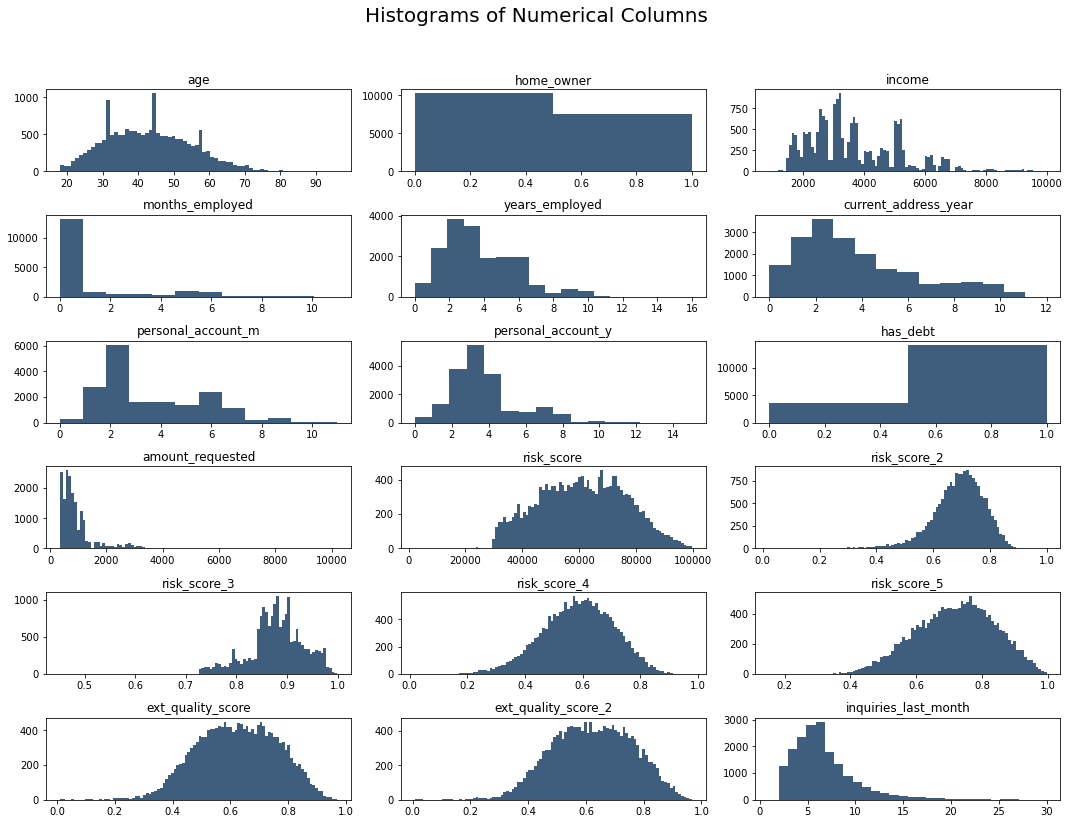

In [8]:
# 앞선 프로젝트의 코드를 사용하자
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100  # bins 크기에 제한을 걺
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


month 데이터를 살펴보면 0에 분포된 빈도수가 많다. 그말은 즉 years_employee 데이터와 combination 된 데이터 이기때문에 많은 사람들이 1,2,3,4,5,6 년 0개월 즉 년도에 맞춰 근무했다고 생각하면된다. -> 결론적으로 months 데이터는 필요가 없을 것 같다.

risk score는 데이터 엔지니어링 팀에서 정제되서 넘어 온 것이라 그런지 안정적인 분포를 확인 할 수 있습니다.

### Correlation

<AxesSubplot:title={'center':'Correlation with E_signed'}>

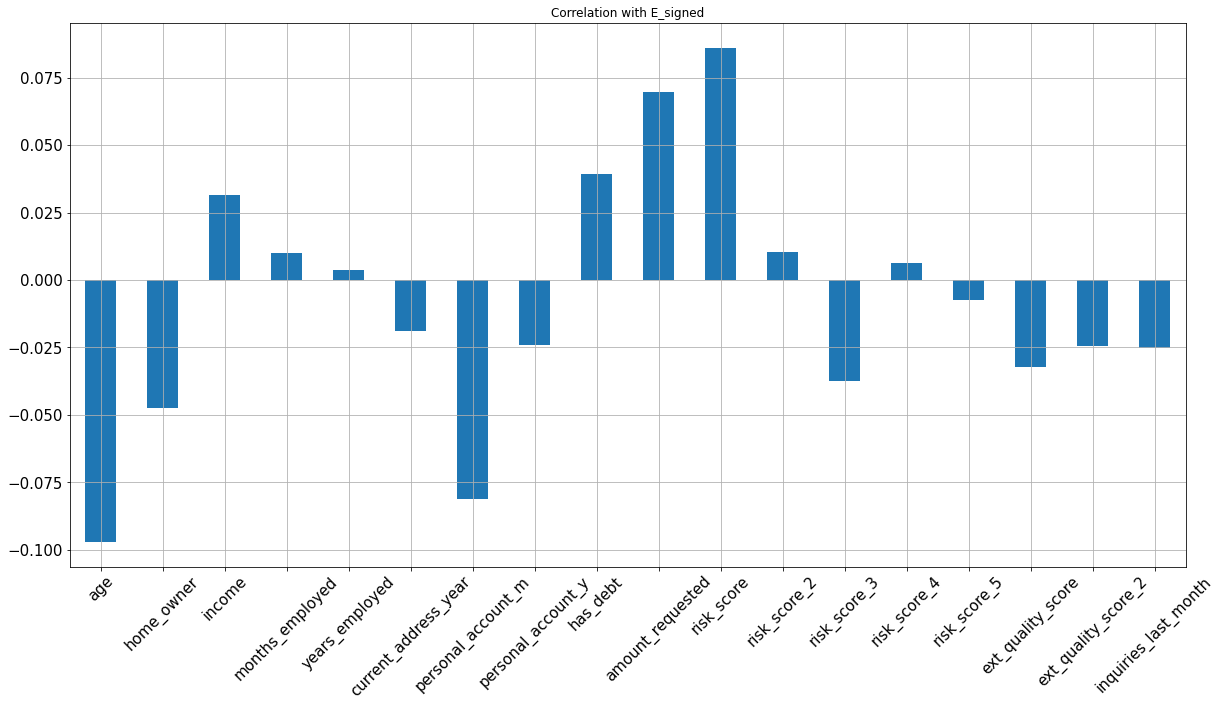

In [9]:
# correlation with response variable
dataset2.corrwith(dataset.e_signed).plot.bar(
    figsize = (20,10), title = 'Correlation with E_signed', fontsize = 15, rot = 45, grid=True)

C:\Users\s\AppData\Local\Temp/ipykernel_11984/560153777.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

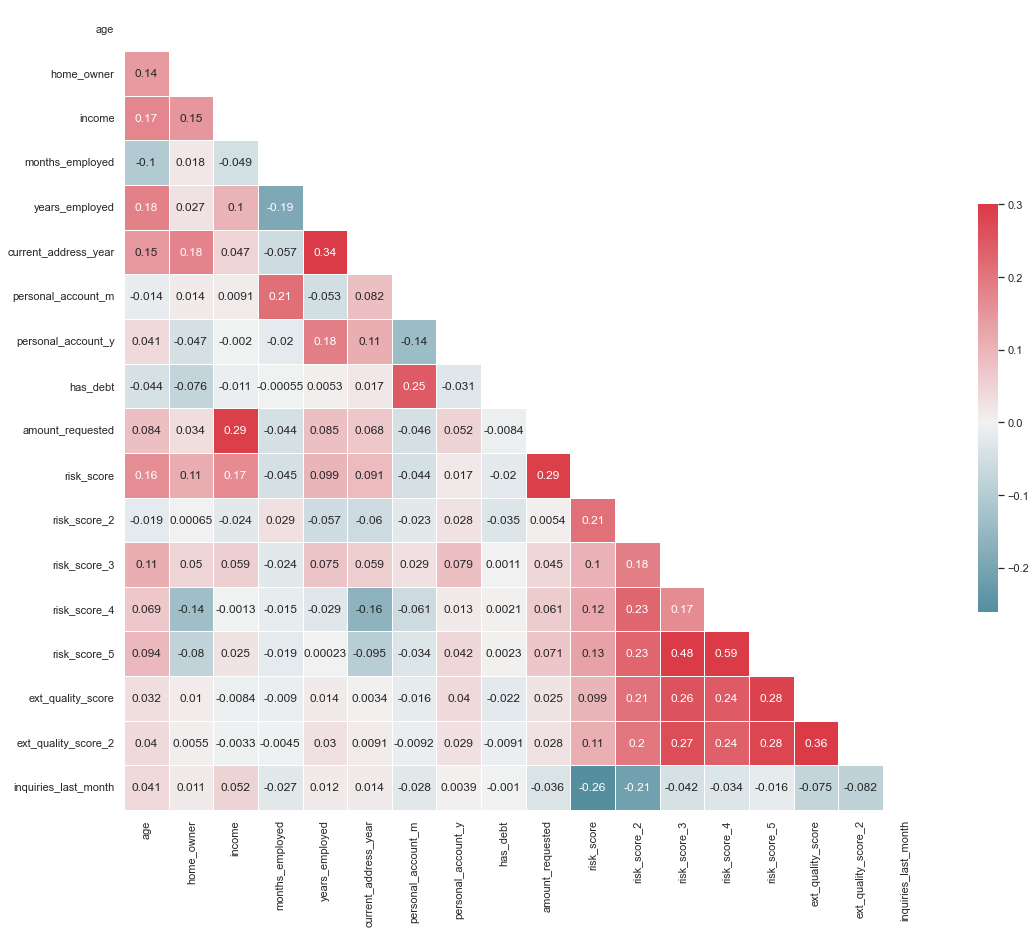

In [10]:
# correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


### Data Preprocessing

In [11]:
import random
import time
random.seed(100)

In [12]:
# Feature Engineering 
# 제거 해야하는 열이 있으면 그것부터 -> months_employed
dataset = dataset.drop(columns = 'months_employed')

In [13]:
# personal_account_m or y 열을 하나의 months 열로 변환해야 합니다.
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12)) #햇수에 12를 곱해 개월 수로

In [14]:
dataset[['personal_account_m', 'personal_account_y','personal_account_months']].head() # 2년 6개월 사용한 분은 30개월로 변경 확인

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [15]:
# 필요없는 feature 제거
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

### One Hot Encoding

In [16]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [17]:
# 선형 독립 feature을 위해 더미 중 하나를 제거 하겠습니다.
dataset = dataset.drop(columns =['pay_schedule_semi-monthly'])

In [18]:
# Removing extra columns
response = dataset['e_signed']
users = dataset['entry_id']
dataset = dataset.drop(columns=['e_signed','entry_id'])

### Splitting into train and test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

### Feature Scailing

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [21]:
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))

In [22]:
x_train2.columns  = x_train.columns.values
x_test2.columns = x_test.columns.values

In [23]:
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values

In [24]:
x_train = x_train2
x_test = x_test2

## 2. 모델 구축

In [25]:
# LogisticRegression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1',solver='liblinear') # 특정변수 연관성이 강할때 penalty

In [26]:
classifier.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [27]:
# predicting test set
y_pred = classifier.predict(x_test)

In [28]:
# accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
# 각 모델간 비교를 위해 pd.DataFrame에 넣어 비교
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall',  'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552


In [32]:
# Support Vector Machine (linear)
from sklearn.svm import SVC
classifier = SVC(random_state =0, kernel= 'linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall',  'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.567839,0.578189,0.728734,0.644791


In [33]:
# 위 모델의 dataframe 과 합체
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791


In [34]:
# Support Vector Machine (RBF)
from sklearn.svm import SVC
classifier = SVC(random_state =0, kernel= 'rbf')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall',  'F1 Score'])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791
2,SVM (RBF),0.592686,0.607519,0.687241,0.644926


In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state =0, n_estimators= 100, criterion = 'entropy')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
            columns = ['Model', 'Accuracy', 'Precision', 'Recall',  'F1 Score'])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791
2,SVM (RBF),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.623953,0.643741,0.674793,0.658901


Random Forest가 가장 높은 수치를 보여주므로 이 모델을 사용해서 진행하겠습니다.

### K - fold Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=x_train, y=y_train,cv=10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


In [37]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791
2,SVM (RBF),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.623953,0.643741,0.674793,0.658901


평균 accuracy = 0.63에 오차가 + - 0.03 정도 입니다. results와 비교하여 타당한 결과인 듯 합니다.

### Grid Search

In [ ]:
RandomForestClassifier # shift tab 으로 인자를 확인했습니다.

In [39]:
# Round 1: Entropy
parameter = {'max_depth':[3, None],
            'max_features':[1,5,10],
            'min_samples_split':[2,5,10],    # 2가 디폴드 값이므로 2를 넣음
            'min_samples_leaf' :[1,5,10],
            'bootstrap': ['True','False'],   # bootstrap 할지 말지
            'criterion': ['entropy']}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameter,
                          scoring = 'accuracy',         # 최고의 parameter를 선택하는 기준
                          cv = 10,                      # 교차검증을 위한 cv
                          n_jobs = -1)                  # 모델을 실행하는데 모든 코어 사용 (-1)

In [41]:
# 실행하는데 시간이 얼마나 걸리는 지 확인하기 위해 time을 사용
t0 = time.time()
grid_search = grid_search.fit(x_train,y_train)
t1 = time.time()
print('Took %0.2f seconds' % (t1-t0))

# 에러가 난다면
# pip install joblib
# conda install joblib 으로 

Took 424.69 seconds


In [46]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': 'True',
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

- (0.6345122647725013,
- {'bootstrap': 'True',
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2}) 결과를 바탕으로 다시 해보자

In [47]:
# Round 2 : entropy
parameter = {'max_depth':[None],
            'max_features':[3,5,7],
            'min_samples_split':[8,10,12],    # 2가 디폴드 값이므로 2를 넣음
            'min_samples_leaf' :[1,2,3],
            'bootstrap': ['True'],   # bootstrap 할지 말지
            'criterion': ['entropy']}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameter,
                          scoring = 'accuracy',         # 최고의 parameter를 선택하는 기준
                          cv = 10,                      # 교차검증을 위한 cv
                          n_jobs = -1)                  # 모델을 실행하는데 모든 코어 사용 (-1)

# 실행하는데 시간이 얼마나 걸리는 지 확인하기 위해 time을 사용
t0 = time.time()
grid_search = grid_search.fit(x_train,y_train)
t1 = time.time()
print('Took %0.2f seconds' % (t1-t0))


rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 172.64 seconds


(0.6356302654508454,
 {'bootstrap': 'True',
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 12})

In [49]:
# Test set에 모델을 적용해 정확도 향상여부를 확인
# predicting test set
y_pred = grid_search.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [50]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791
2,SVM (RBF),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.623953,0.643741,0.674793,0.658901
4,"Random Forest (n=100, GSx2 + Entropy)",0.627582,0.644596,0.686722,0.664992


In [53]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 343.01 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [54]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 164.20 seconds


(0.635420816975755,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

In [55]:
# Predicting Test Set
y_pred = grid_search.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791
2,SVM (RBF),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.623953,0.643741,0.674793,0.658901
4,"Random Forest (n=100, GSx2 + Entropy)",0.627582,0.644596,0.686722,0.664992
5,"Random Forest (n=100, GSx2 + Gini)",0.627582,0.643895,0.689315,0.665832


## 3. 모델 완성!

In [56]:
# Formatting final Results
final_results = pd.concat([y_test, users], axis=1).dropna() #물론 이번 데이터에는 na가 없어요!
final_results['predictions']= y_pred
final_results = final_results[['entry_id', 'e_signed','predictions']]
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,1
